In [101]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import re

In [102]:
x, y, r, theta, phi = sp.symbols('x y r theta phi')

allowed_functions = {
    'sin': sp.sin,
    'cos': sp.cos,
    'tan': sp.tan,
    'exp': sp.exp,
    'log': sp.log,
    'sqrt': sp.sqrt,
    'ln': sp.ln,
}

def get_function():
    while True:
        try:
            expression = input("Introduce la función en términos de x, y, r, theta, o phi (por ejemplo, sin(x) + cos(y)): ")

            # Reemplaza los nombres de las funciones en la entrada del usuario con la versión sympy correspondiente
            for func in allowed_functions:
                expression = re.sub(rf'\b{func}\b', f'allowed_functions["{func}"]', expression)
            
            parsed_expression = sp.parse_expr(expression, local_dict={'allowed_functions': allowed_functions, 'x': x, 'y': y, 'r': r, 'theta': theta, 'phi': phi})

            # Obtén todos los símbolos en la expresión
            symbols_in_expression = parsed_expression.free_symbols
            
            # Define un conjunto de símbolos permitidos
            allowed_symbols = {x, y, r, theta, phi}
            
            # Verifica si todos los símbolos en la expresión están en el conjunto de símbolos permitidos
            if all(symbol in allowed_symbols for symbol in symbols_in_expression):
                return parsed_expression
            else:
                print("La función contiene variables no permitidas. Inténtalo de nuevo.")
        except:
            print("Expresión no válida. Asegúrate de usar funciones y símbolos permitidos. Por favor, inténtalo de nuevo.")


def get_coordinate_system():
    while True:
        system = input("Elige el sistema de coordenadas (cartesianas, cilindricas, esfericas): ").strip().lower()
        if system in ['cartesianas', 'cilindricas', 'esfericas']:
            return system
        else:
            print("Sistema de coordenadas no disponible. Vuelve a intentarlo.")

In [103]:
def plot_cartesian(f):
    x_range = np.linspace(-10, 10, 100)
    y_range = np.linspace(-10, 10, 100)
    
    f_eval = sp.lambdify((x, y), f, 'numpy')
    x_values, y_values = np.meshgrid(x_range, y_range)
    z_values = f_eval(x_values, y_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_values, y_values, z_values, cmap="viridis")
    
    ax.set_title("Coordenadas Cartesianas")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    ax.set_zlabel("Eje z")
    
    display(Math(f"z = {sp.latex(f)}"))
    plt.show()


def plot_cylindrical(f):
    r_range = np.linspace(0, 10, 100)
    theta_range = np.linspace(0, 2*np.pi, 100)
    
    x_cyl = r * sp.cos(theta)
    y_cyl = r * sp.sin(theta)
    f_cyl = f.subs([(x, x_cyl), (y, y_cyl)])
    
    f_cyl_eval = sp.lambdify((r, theta), f_cyl, 'numpy')
    
    r_values, theta_values = np.meshgrid(r_range, theta_range)
    x_values = r_values * np.cos(theta_values)
    y_values = r_values * np.sin(theta_values)
    z_values = f_cyl_eval(r_values, theta_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_values, y_values, z_values, cmap="viridis")
    
    ax.set_title("Coordenadas Cilíndricas")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    ax.set_zlabel("Eje z")
    
    display(Math(f"z = {sp.latex(f_cyl)}"))
    plt.show()


def plot_spherical(f):
    theta_range = np.linspace(0, 2*np.pi, 100)
    phi_range = np.linspace(0, np.pi, 100)
    
    x_sph = r * sp.sin(phi) * sp.cos(theta)
    y_sph = r * sp.sin(phi) * sp.sin(theta)
    f_sph = f.subs([(x, x_sph), (y, y_sph)])
    
    f_sph_eval = sp.lambdify((r, theta, phi), f_sph, 'numpy')
    
    theta_values, phi_values = np.meshgrid(theta_range, phi_range)
    r_values = np.full_like(theta_values, 10)  # Ajusta el radio a un valor constante
    
    x_values = r_values * np.sin(phi_values) * np.cos(theta_values)
    y_values = r_values * np.sin(phi_values) * np.sin(theta_values)
    z_values = f_sph_eval(r_values, theta_values, phi_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_values, y_values, z_values, cmap="viridis")
    
    ax.set_title("Coordenadas Esféricas")
    ax.set_xlabel("Eje x")
    ax.set_ylabel("Eje y")
    ax.set_zlabel("Eje z")
    
    display(Math(f"z = {sp.latex(f_sph)}"))
    plt.show()

Sistema de coordenadas no disponible. Vuelve a intentarlo.
La función contiene variables no permitidas. Inténtalo de nuevo.


<IPython.core.display.Math object>

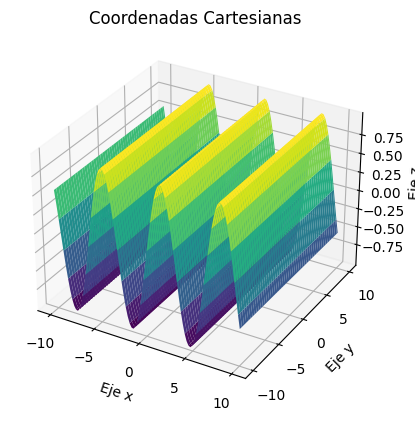

In [104]:
# Obtén el sistema de coordenadas y la función del usuario
coordinate_system = get_coordinate_system()
f = get_function()

# Grafica la función en el sistema de coordenadas elegido
if coordinate_system == 'cartesianas':
    plot_cartesian(f)
elif coordinate_system == 'cilindricas':
    plot_cylindrical(f)
elif coordinate_system == 'esfericas':
    plot_spherical(f)
else:
    print(f"Sistema de coordenadas '{coordinate_system}' no reconocido.")